In [2]:
# import libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
!pip install wordcloud

In [4]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

In [5]:
airbnb_data_1 = pd.read_csv('airbnb_reviews.csv')

In [6]:
airbnb_data_1.head()

,Category,Title,Image,Rating,Total Reviews,Location,Price,Reviews
0,Amazing pools,"The Villa Manzara, Luxury Villa In Kyrenia",https://a0.muscache.com/im/pictures/miso/Hosti...,5.0,6.0,Cyprus,385.0,['The villa is amazing just like the photos sh...
1,Amazing pools,Private Pool Seafront Villa - 4 Master Br,https://a0.muscache.com/im/pictures/e89267dc-5...,4.9,68.0,Cyprus,223.0,['This villa can be described as glorious. May...
2,Amazing pools,Villa Liberty #22,https://a0.muscache.com/im/pictures/miso/Hosti...,5.0,16.0,Cyprus,192.0,"['Near to different beaches, shops. Very great..."
3,Amazing pools,Protaras Holiday Villa TI39,https://a0.muscache.com/im/pictures/prohost-ap...,NaN,NaN,Cyprus,501.0,"['Beautiful villa, beach just across the stree..."
4,Amazing pools,Seaside Emerald Villa,https://a0.muscache.com/im/pictures/miso/Hosti...,NaN,NaN,Cyprus,534.0,NaN


In [7]:
airbnb_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4720 entries, 0 to 4719
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Category       4720 non-null   object 
 1   Title          4720 non-null   object 
 2   Image          4720 non-null   object 
 3   Rating         3324 non-null   float64
 4   Total Reviews  3324 non-null   float64
 5   Location       4720 non-null   object 
 6   Price          4712 non-null   float64
 7   Reviews        3802 non-null   object 
dtypes: float64(3), object(5)
memory usage: 295.1+ KB


In [9]:
#Check for unique values
airbnb_data_1.nunique()

Category           16
Title            4158
Image            4226
Rating             97
Total Reviews     343
Location           95
Price            1216
Reviews          3343
dtype: int64

In [10]:
#check for null values in our data
airbnb_data_1.isnull().sum()

Category            0
Title               0
Image               0
Rating           1396
Total Reviews    1396
Location            0
Price               8
Reviews           918
dtype: int64

In [11]:
airbnb_data_1.shape

(4720, 8)

## Dealing with Null Values

In [12]:
# Calculate the % of null values
total_rows = len(airbnb_data_1)
null_rows = airbnb_data_1.isnull().sum()

percentage_nulls = (null_rows / total_rows) * 100

print(f"The percentage of null values is:\n{percentage_nulls}")

The percentage of null values is:
Category          0.000000
Title             0.000000
Image             0.000000
Rating           29.576271
Total Reviews    29.576271
Location          0.000000
Price             0.169492
Reviews          19.449153
dtype: float64


**Rating, Total Reviews** and **Reviews** have missing data. It will be better to delete these columns as they will not provide any meaningful information.

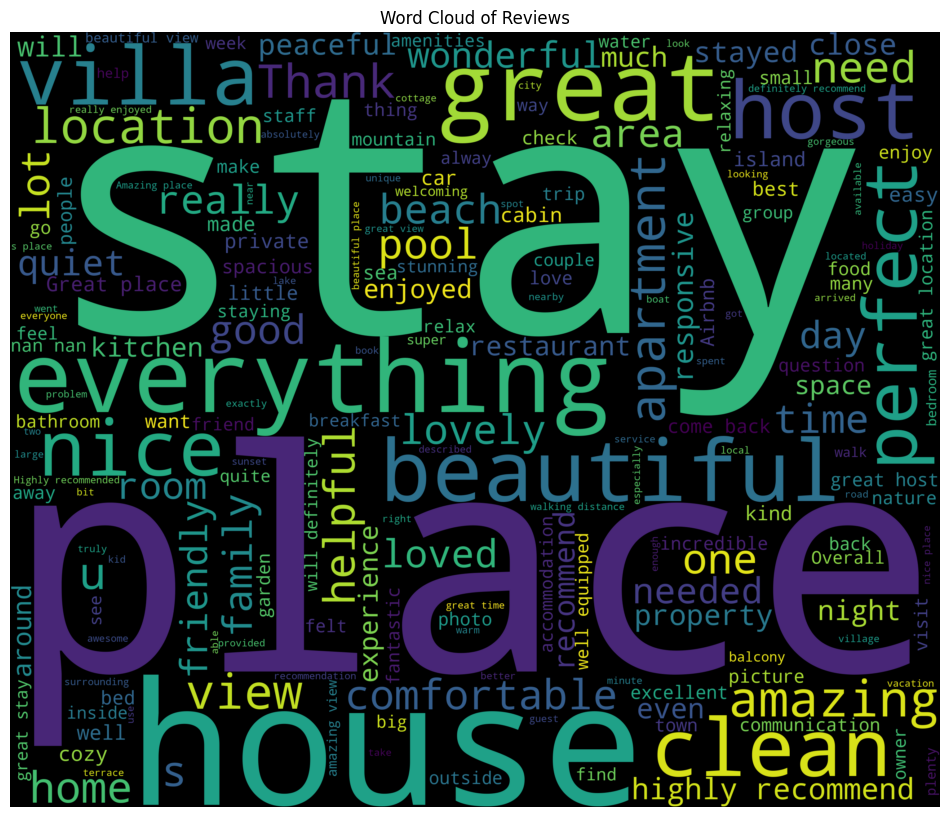

In [78]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all reviews into a single string
all_reviews = ' '.join(review for review in airbnb_data_1['Reviews'].dropna())

# Generate a word cloud object
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(all_reviews)
#wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Display the word cloud using matplotlib
plt.figure(1, figsize=(12, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove axes
plt.title('Word Cloud of Reviews')
plt.show()


In [14]:
!pip install vaderSentiment

In [16]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment scores for each review
def get_sentiment_scores(text):
    return analyzer.polarity_scores(text)

# Apply the sentiment analyzer to the 'Reviews' column
airbnb_data_1['Sentiment Scores'] = airbnb_data_1['Reviews'].dropna().apply(get_sentiment_scores)

# Convert the entire 'Sentiment Scores' column to ensure consistent data types
airbnb_data_1['Sentiment Scores'] = airbnb_data_1['Sentiment Scores'].astype(str)

# Extract compound scores from the sentiment scores
airbnb_data_1['Compound Score'] = airbnb_data_1['Sentiment Scores'].apply(lambda score: eval(score)['compound'] if score != 'nan' else None)

# Displaying the results
print(airbnb_data_1[['Reviews', 'Compound Score']])


                                                Reviews  Compound Score
0     ['The villa is amazing just like the photos sh...          0.9993
1     ['This villa can be described as glorious. May...          0.9988
2     ['Near to different beaches, shops. Very great...          0.9958
3     ['Beautiful villa, beach just across the stree...          0.5994
4                                                   NaN             NaN
...                                                 ...             ...
4715  ['Best place to stay in Holbox. The free break...          0.9982
4716  ['I was with a friend and we had an amazing ti...          0.9976
4717  ['They offered us a rental car with good price...          0.9937
4718  ['great experience, good location', 'Great pro...          0.9855
4719  ['This is a hidden gem in La Gaulette. We defe...          0.9984

[4720 rows x 2 columns]


In [18]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Convert non-string (float) values to string in the 'Reviews' column
airbnb_data_1['Reviews'] = airbnb_data_1['Reviews'].astype(str)

# Function to get sentiment scores
def get_sentiment_scores(sentence):
    score = analyzer.polarity_scores(sentence)
    return score

# Apply sentiment analysis to the 'Reviews' column
airbnb_data_1['Sentiment Scores'] = airbnb_data_1['Reviews'].apply(get_sentiment_scores)

# Function to classify sentiment
def classify_sentiment(score):
    # Classify as positive, negative, or neutral based on compound score
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Classify sentiments and create a new column 'Sentiment'
airbnb_data_1['Sentiment'] = airbnb_data_1['Sentiment Scores'].apply(lambda x: classify_sentiment(x['compound']))

# Display the DataFrame with sentiment classification
print(airbnb_data_1[['Reviews', 'Sentiment']])


                                                Reviews Sentiment
0     ['The villa is amazing just like the photos sh...  Positive
1     ['This villa can be described as glorious. May...  Positive
2     ['Near to different beaches, shops. Very great...  Positive
3     ['Beautiful villa, beach just across the stree...  Positive
4                                                   nan   Neutral
...                                                 ...       ...
4715  ['Best place to stay in Holbox. The free break...  Positive
4716  ['I was with a friend and we had an amazing ti...  Positive
4717  ['They offered us a rental car with good price...  Positive
4718  ['great experience, good location', 'Great pro...  Positive
4719  ['This is a hidden gem in La Gaulette. We defe...  Positive

[4720 rows x 2 columns]


C:\Users\aneja\AppData\Local\Temp\ipykernel_32900\2424136742.py:17: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  legend_handles = [plt.Rectangle((0,0),1,1, color=colors[i], edgecolor='black') for i in range(len(colors))]


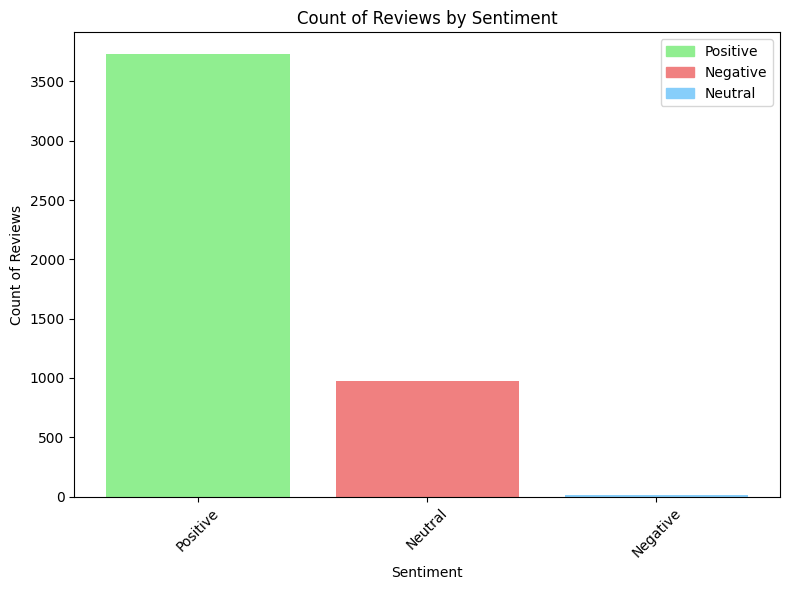

In [77]:
# Grouping by sentiment and counting the number of reviews for each sentiment
sentiment_counts = airbnb_data_1['Sentiment'].value_counts()

# Define colors for the sentiments
colors = ['lightgreen', 'lightcoral', 'lightskyblue']
legend_labels = ['Positive', 'Negative', 'Neutral']

# Plotting the bar graph with individual colors for each sentiment
plt.figure(figsize=(8, 6))
bars = plt.bar(sentiment_counts.index, sentiment_counts.values, color=colors)
plt.title('Count of Reviews by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count of Reviews')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Create proxy artists for the legend
legend_handles = [plt.Rectangle((0,0),1,1, color=colors[i], edgecolor='black') for i in range(len(colors))]
plt.legend(legend_handles, legend_labels, loc='upper right')

plt.tight_layout()
plt.show()


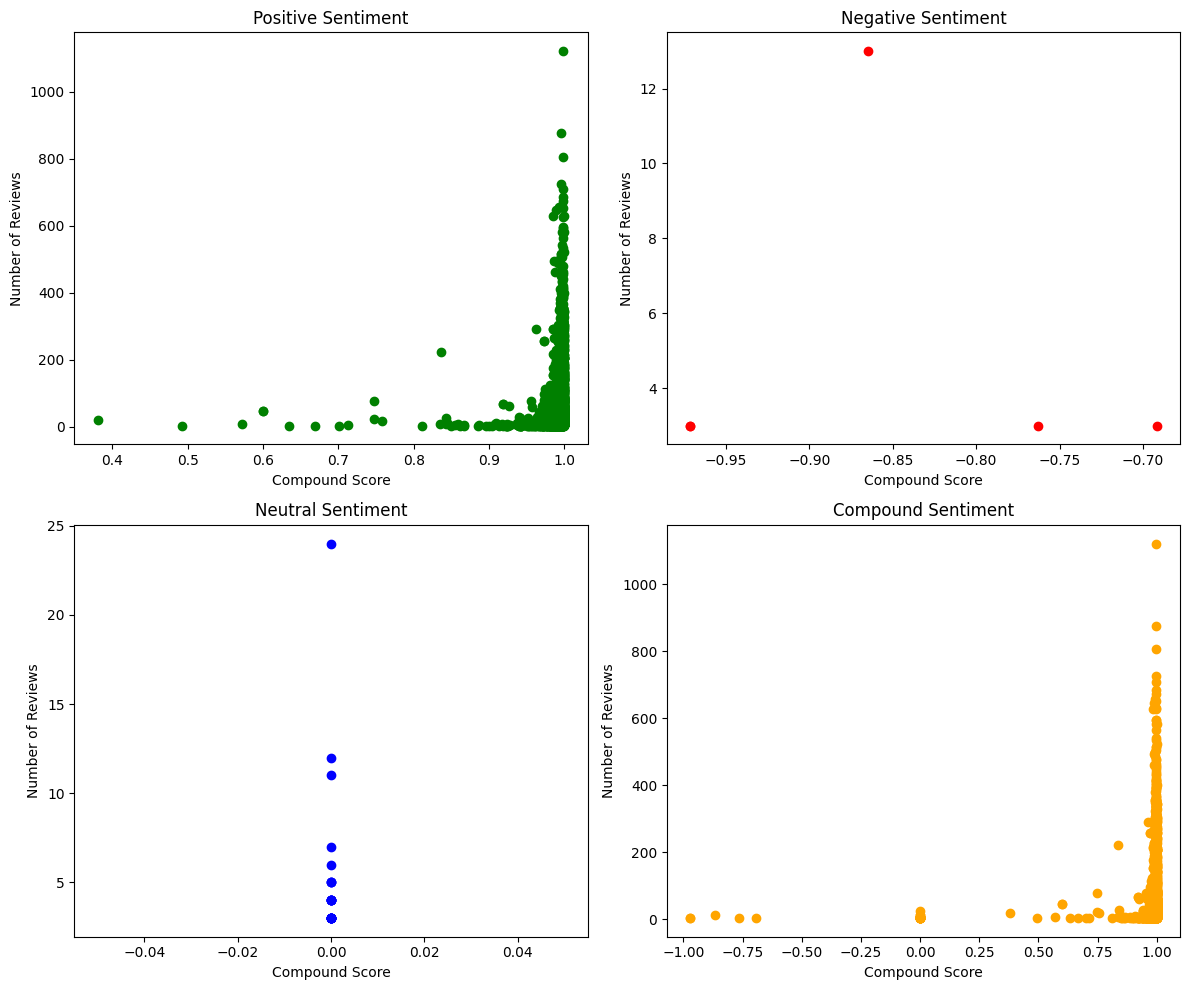

In [84]:
# Filter data for each sentiment category
positive_data = airbnb_data_1[airbnb_data_1['Sentiment'] == 'Positive']
negative_data = airbnb_data_1[airbnb_data_1['Sentiment'] == 'Negative']
neutral_data = airbnb_data_1[airbnb_data_1['Sentiment'] == 'Neutral']

# Plotting the number of reviews against the corresponding sentiment scores for each category
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Positive sentiment score vs. number of reviews
axes[0, 0].scatter(positive_data['Compound Score'], positive_data['Total Reviews'], color='green')
axes[0, 0].set_title('Positive Sentiment')
axes[0, 0].set_xlabel('Compound Score')
axes[0, 0].set_ylabel('Number of Reviews')

# Negative sentiment score vs. number of reviews
axes[0, 1].scatter(negative_data['Compound Score'], negative_data['Total Reviews'], color='red')
axes[0, 1].set_title('Negative Sentiment')
axes[0, 1].set_xlabel('Compound Score')
axes[0, 1].set_ylabel('Number of Reviews')

# Neutral sentiment score vs. number of reviews
axes[1, 0].scatter(neutral_data['Compound Score'], neutral_data['Total Reviews'], color='blue')
axes[1, 0].set_title('Neutral Sentiment')
axes[1, 0].set_xlabel('Compound Score')
axes[1, 0].set_ylabel('Number of Reviews')

# Compound sentiment score vs. number of reviews
axes[1, 1].scatter(airbnb_data_1['Compound Score'], airbnb_data_1['Total Reviews'], color='orange')
axes[1, 1].set_title('Compound Sentiment')
axes[1, 1].set_xlabel('Compound Score')
axes[1, 1].set_ylabel('Number of Reviews')

plt.tight_layout()
plt.show()


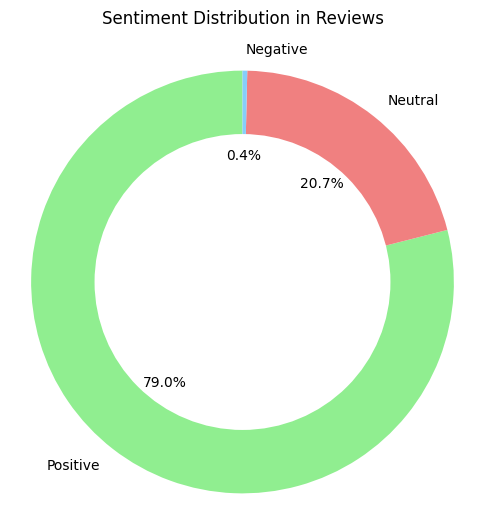

In [28]:
import matplotlib.pyplot as plt

# Calculate counts of each sentiment category
sentiment_counts = airbnb_data_1['Sentiment'].value_counts()

# Plotting a donut chart
plt.figure(figsize=(6, 6))
labels = sentiment_counts.index
sizes = sentiment_counts.values
colors = ['lightgreen', 'lightcoral', 'lightskyblue']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Draw a circle to create the donut chart
centre_circle = plt.Circle((0, 0), 0.7, color='white', linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')
plt.title('Sentiment Distribution in Reviews',pad=20)
plt.show()

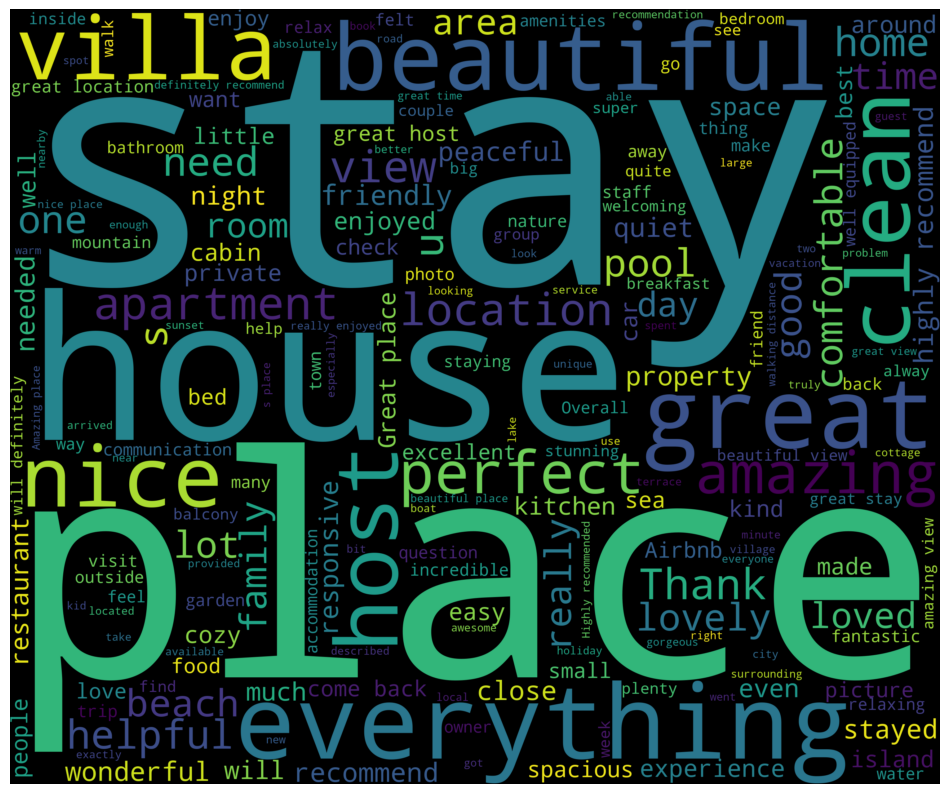

In [85]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter positive comments
positive_comments = airbnb_data_1[airbnb_data_1['Sentiment'] == 'Positive']['Reviews']

# Combine all positive comments into a single string
all_positive_comments = ' '.join(positive_comments)

# Generate the word cloud
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500).generate(all_positive_comments)

# Display the word cloud
plt.figure(1, figsize=(12, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
#plt.title('Word Cloud for Positive Comments')
plt.show()

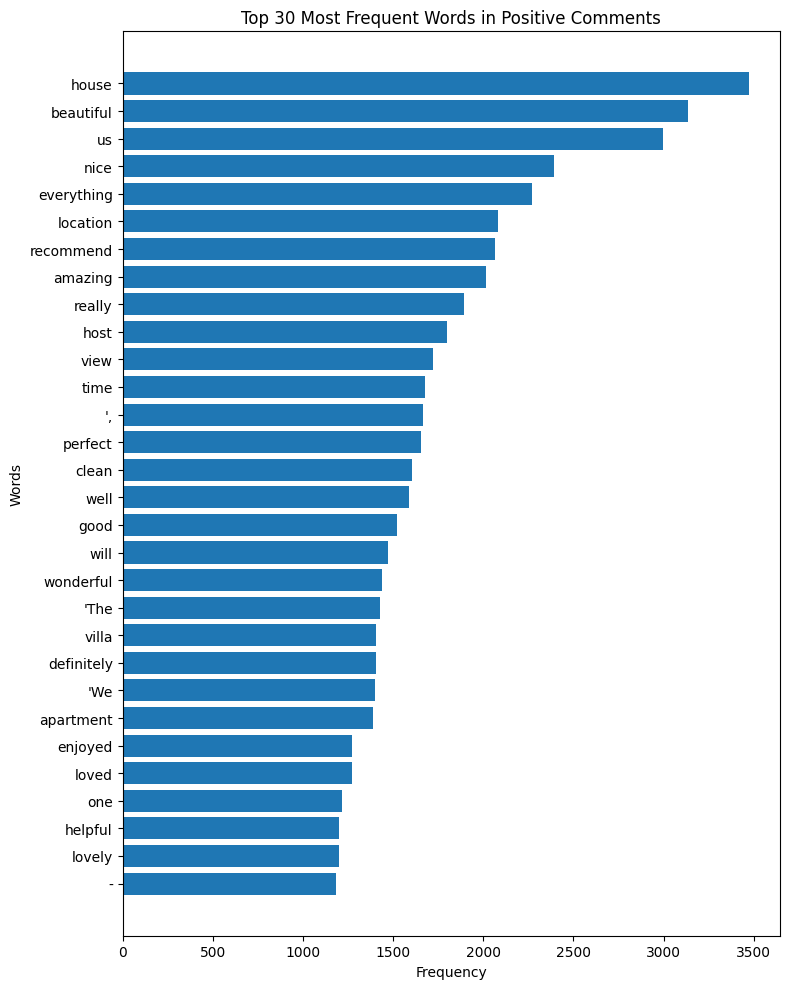

In [40]:
from wordcloud import STOPWORDS
from collections import Counter
import matplotlib.pyplot as plt

# Filter positive comments
positive_comments = airbnb_data_1[airbnb_data_1['Sentiment'] == 'Positive']['Reviews']

# Combine all positive comments into a single string
all_positive_comments = ' '.join(positive_comments)

# Removing common words and stopwords
stopwords = set(STOPWORDS)
stopwords.update(["stay", "stayed", "great", "place"])  # Add custom stopwords if needed
all_positive_comments = ' '.join([word for word in all_positive_comments.split() if word.lower() not in stopwords])

# Calculate word frequency
word_freq = Counter(all_positive_comments.split())

# Sort words and their frequencies in descending order
sorted_word_freq = dict(sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:30])

# Sort the data for plotting in the correct order
sorted_word_freq = {k: v for k, v in sorted(sorted_word_freq.items(), key=lambda item: item[1], reverse=True)}

# Plotting the top 20 most frequent words horizontally
plt.figure(figsize=(8, 10))
plt.barh(list(sorted_word_freq.keys()), list(sorted_word_freq.values()))
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 30 Most Frequent Words in Positive Comments')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


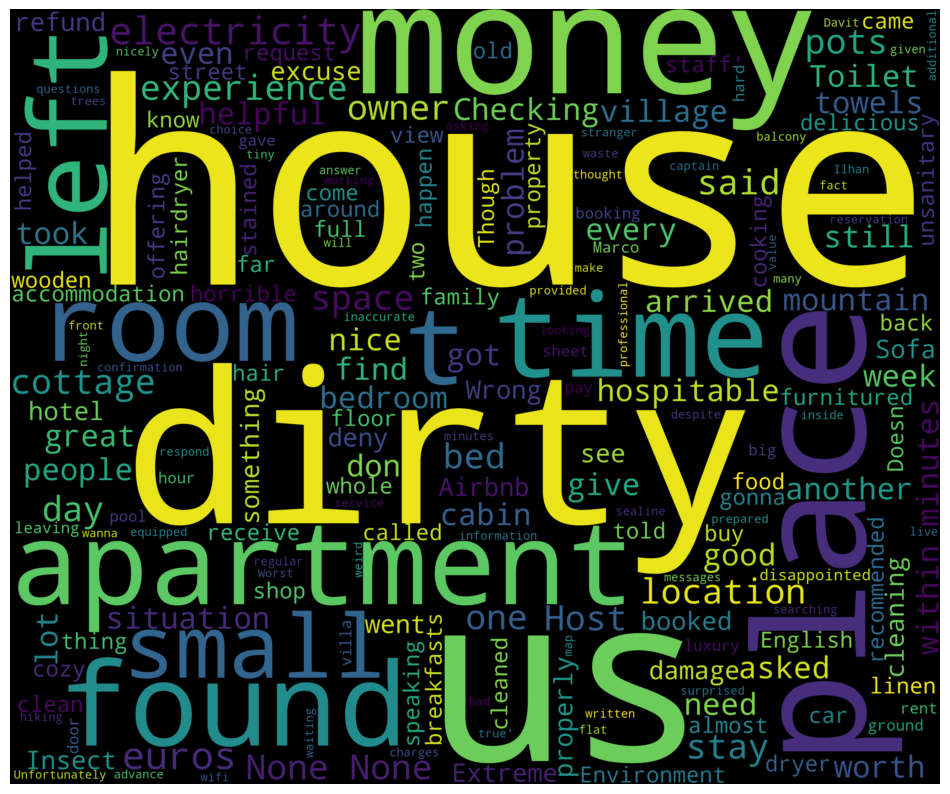

In [86]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter positive comments
negative_comments = airbnb_data_1[airbnb_data_1['Sentiment'] == 'Negative']['Reviews']

# Combine all positive comments into a single string
all_negative_comments = ' '.join(negative_comments)

# Generate the word cloud
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500).generate(all_negative_comments)

# Display the word cloud
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
#plt.title('Word Cloud for Negative Comments')
plt.show()

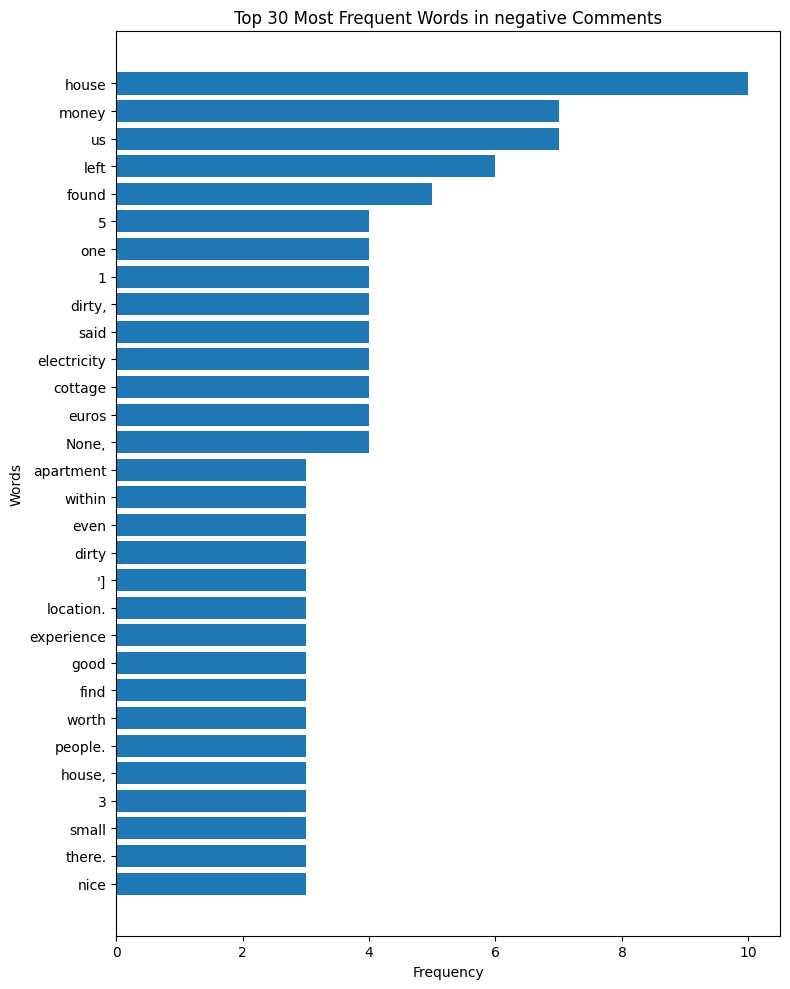

In [42]:
from wordcloud import STOPWORDS
from collections import Counter
import matplotlib.pyplot as plt

# Filter negative comments
negative_comments = airbnb_data_1[airbnb_data_1['Sentiment'] == 'Negative']['Reviews']

# Combine all negative comments into a single string
all_negative_comments = ' '.join(negative_comments)

# Removing common words and stopwords
stopwords = set(STOPWORDS)
stopwords.update(["stay", "stayed", "great", "place"])  # Add custom stopwords if needed
all_negative_comments = ' '.join([word for word in all_negative_comments.split() if word.lower() not in stopwords])

# Calculate word frequency
word_freq = Counter(all_negative_comments.split())

# Sort words and their frequencies in descending order
sorted_word_freq = dict(sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:30])

# Sort the data for plotting in the correct order
sorted_word_freq = {k: v for k, v in sorted(sorted_word_freq.items(), key=lambda item: item[1], reverse=True)}

# Plotting the top 20 most frequent words horizontally
plt.figure(figsize=(8, 10))
plt.barh(list(sorted_word_freq.keys()), list(sorted_word_freq.values()))
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 30 Most Frequent Words in negative Comments')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

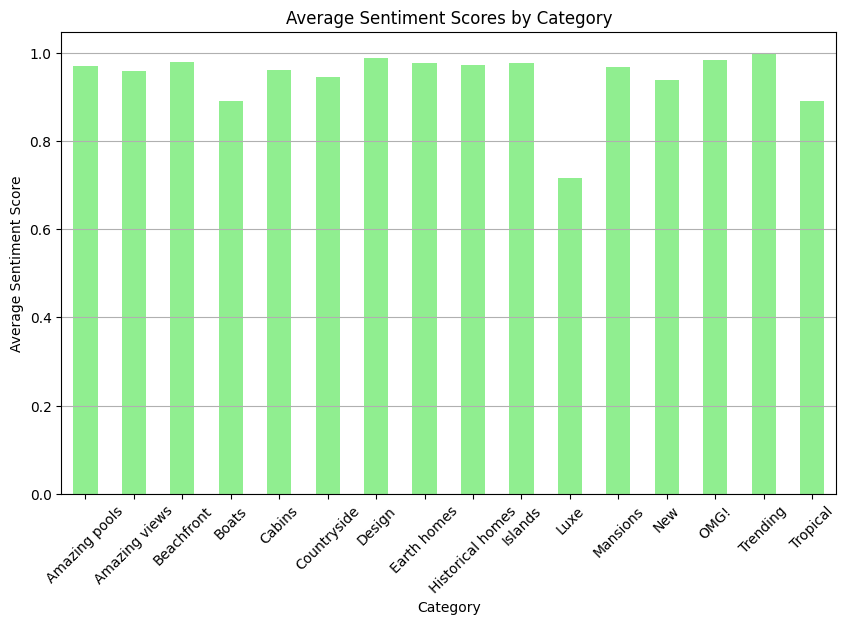

In [65]:
#group by 'Category' and calculate the mean sentiment scores
category_sentiments = airbnb_data_1.groupby('Category')['Compound Score'].mean()


# Plotting sentiment scores by Category
plt.figure(figsize=(10, 6))
category_sentiments.plot(kind='bar', color='lightgreen')
plt.title('Average Sentiment Scores by Category')
plt.xlabel('Category')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


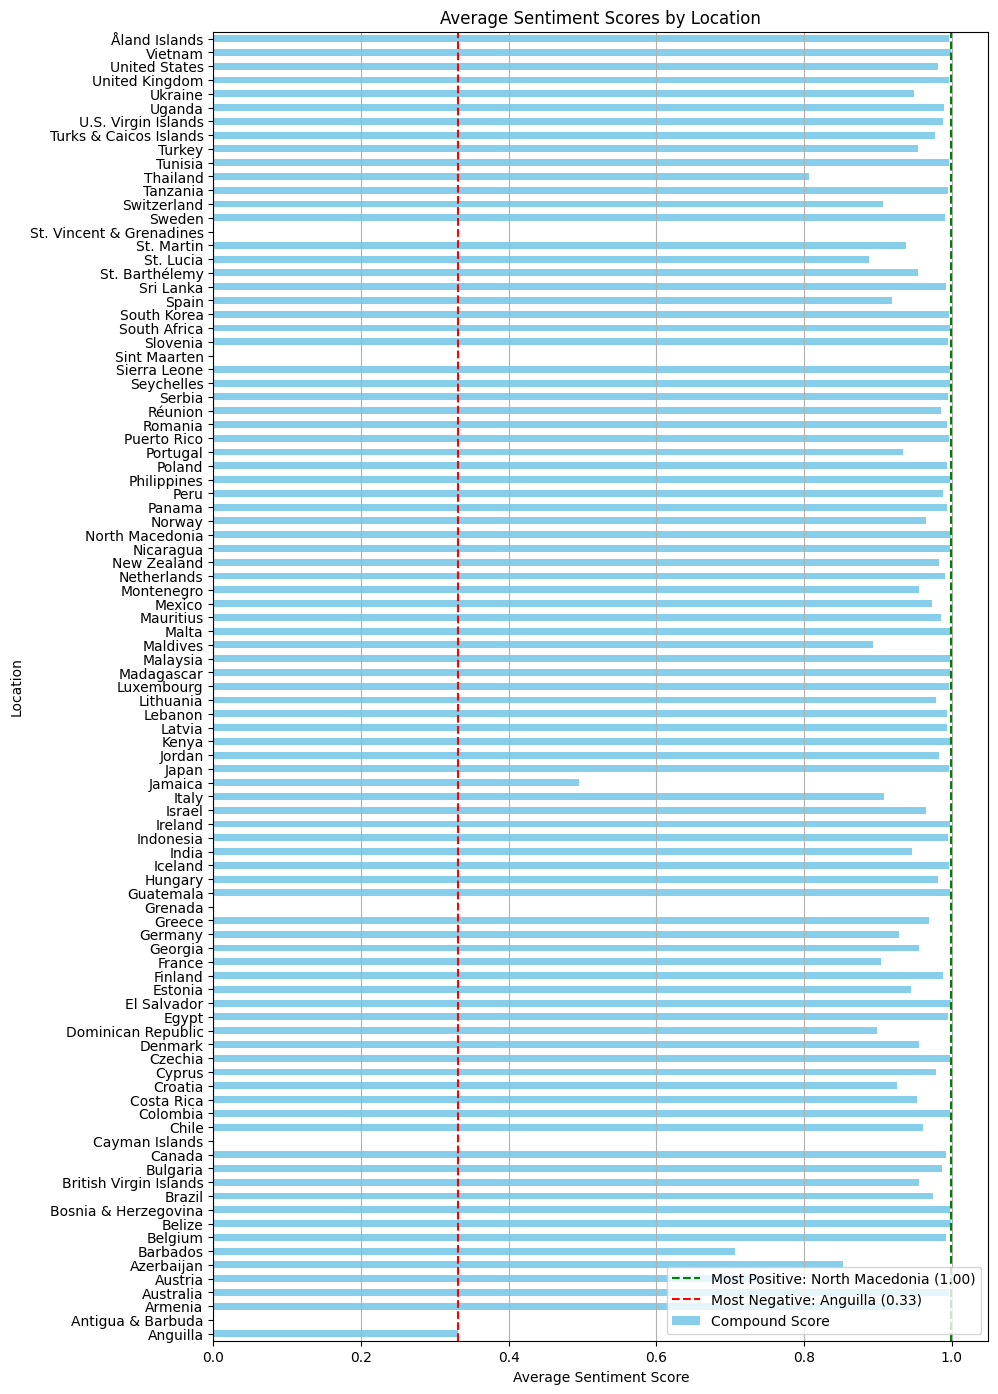

In [60]:
# Plotting the highest and lowest sentiment scores horizontally
plt.figure(figsize=(10, 17))
location_sentiments.plot(kind='barh', color='skyblue')
plt.title('Average Sentiment Scores by Location')
plt.ylabel('Location')
plt.xlabel('Average Sentiment Score')
plt.axvline(max_positive_score, color='green', linestyle='--', label=f'Most Positive: {most_positive_location} ({max_positive_score:.2f})')
plt.axvline(min_negative_score, color='red', linestyle='--', label=f'Most Negative: {most_negative_location} ({min_negative_score:.2f})')
plt.legend()
plt.grid(axis='x')
plt.show()


In [66]:
# Find the location with the highest positive sentiment
most_positive_location = location_sentiments.idxmax()
max_positive_score = location_sentiments.max()

# Find the location with the lowest sentiment (most negative)
most_negative_location = location_sentiments.idxmin()
min_negative_score = location_sentiments.min()

print(f"Location with the most positive comments: {most_positive_location} (Score: {max_positive_score:.2f})")
print(f"Location with the most negative comments: {most_negative_location} (Score: {min_negative_score:.2f})")


Location with the most positive comments: North Macedonia (Score: 1.00)
Location with the most negative comments: Anguilla (Score: 0.33)
